In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score

from sklearn.feature_selection import RFECV
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import resample

from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
# for feature selection
from sklearn.feature_selection import RFECV
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('cleaned_fire_data.csv')

In [3]:
conditions = [df['stat_cause_descr'] == 'Missing/Undefined',
 df['stat_cause_descr'] == 'Arson',
 df['stat_cause_descr'] == 'Debris Burning',
 df['stat_cause_descr'] == 'Campfire',
 df['stat_cause_descr'] == 'Miscellaneous',
 df['stat_cause_descr'] == 'Fireworks',
 df['stat_cause_descr'] == 'Lightning',
 df['stat_cause_descr'] == 'Equipment Use',
 df['stat_cause_descr'] == 'Children',
 df['stat_cause_descr'] == 'Smoking',
 df['stat_cause_descr'] == 'Railroad',
 df['stat_cause_descr'] == 'Structure',
 df['stat_cause_descr'] == 'Powerline']
outputs = range(0,(len(conditions)))
df['stat_cause_descr'] = np.select(conditions, outputs)

In [4]:
cols_to_drop = [
    'Unnamed: 0',
    'fire_size',
    'fire_size_class',
    'disc_clean_date'
]

In [5]:
df = df.drop(columns=cols_to_drop,axis=1)

In [6]:
df

,stat_cause_descr,latitude,longitude,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,Prec_pre_30,Prec_pre_15,Prec_pre_7,remoteness,target,month,year,temp_avg,is_remote,did_rain,Temp_pre_30_bin,Temp_pre_15_bin,Temp_pre_7_bin,discovery_month_Aug,discovery_month_Dec,discovery_month_Feb,discovery_month_Jan,discovery_month_Jul,discovery_month_Jun,discovery_month_Mar,discovery_month_May,discovery_month_Nov,discovery_month_Oct,discovery_month_Sep,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_PR,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,Vegetation_4,Vegetation_9,Vegetation_12,Vegetation_14,Vegetation_15,Vegetation_16,longitude_bin,west_coast,very_windy_30,very_windy_15,very_windy_7,low_humid_30,low_humid_15,low_humid_7
0,0,18.105072,-66.753044,76.065753,76.490462,76.824675,4.341807,3.492857,3.262092,78.216590,76.793750,76.381579,0.0,0.0,0.0,0.017923,0,2,2007,76.460297,0,0,3,3,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,1,1,1,0,0,0
1,1,35.038330,-87.610000,45.596180,44.618000,32.618353,2.709764,2.881707,1.976471,70.840000,65.858911,55.505882,59.8,8.4,0.0,0.184355,0,12,2006,40.944178,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0
2,1,34.947800,-88.722500,40.949474,42.408979,42.005750,3.364499,2.923830,2.695833,75.531629,75.868613,76.812834,168.8,42.2,18.1,0.194544,0,2,2004,41.788067,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0
3,2,39.641400,-119.308300,61.296741,66.193126,64.656615,4.054982,3.398329,3.671282,44.778429,37.140811,35.353846,10.4,7.2,0.0,0.487447,0,6,2005,64.048828,0,1,2,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
4,3,30.904720,-93.557500,62.333490,62.596009,68.782609,1.331257,1.472949,1.424783,72.899478,75.061381,77.924623,28.4,27.5,1.2,0.241894,0,11,2005,64.570703,0,1,2,2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36530,0,37.606667,-96.422500,38.635038,37.471742,39.987614,5.100510,5.694737,4.975000,62.971774,69.376658,68.118919,20.1,18.8,0.0,0.365622,1,2,2015,38.698132,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0
36531,0,40.394700,-104.564600,67.722291,66.728555,65.620761,2.507911,2.553364,2.638542,51.010341,50.264501,48.204861,4.6,0.0,0.0,0.199532,1,9,2015,66.690536,0,1,2,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1
36532,0,39.180000,-96.784167,67.497438,62.404308,66.054190,3.259176,2.705398,3.196648,65.671410,61.839572,54.625698,35.4,8.2,0.0,0.331501,1,10,2015,65.318645,0,1,2,2,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

# Baseline Train Test Split

In [343]:
# Creating Feature data frame and Target data frame
X = df.drop(columns='target',axis=1)
y = df['target']

# Creating Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Scaling is Needed for Knn
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

# Baseline Models

All 3 of the below models use basic parameters to give baseline information.

In [344]:
def LogRegTest(input_x,input_y):
    lr = LogisticRegression(random_state=1,C=1e9)
    lr.fit(input_x,input_y)
    pred_train = lr.predict(input_x)
    score = f1_score(input_y,pred_train,zero_division=1)
    return score

In [345]:
def KnnTest(input_x,input_y):
    knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto',weights='uniform')
    knn.fit(input_x,input_y)
    pred_train = knn.predict(input_x)
    score = f1_score(input_y,pred_train,zero_division=1)
    return score

In [346]:
def DTreeTest(input_x,input_y):
    tree = DecisionTreeClassifier(max_depth=12, min_samples_split=17,criterion='gini',min_samples_leaf=4)
    tree.fit(input_x,input_y)
    pred_train = tree.predict(input_x)
    score = f1_score(input_y,pred_train,zero_division=1)
    return score

In [347]:
def three_class_test(X_train,y_train):
    print('LogReg F1: ', LogRegTest(X_train,y_train))
    print('Knn F1: ', KnnTest(X_train,y_train))
    print('Dtree F1: ', DTreeTest(X_train,y_train))
    return

# Baseline with Test Scores

In [196]:
# Logistic Regression
lr = LogisticRegression(random_state=2,C=1e9,class_weight='balanced',penalty='l2')

lr.fit(X_train,y_train)

pred_train = lr.predict(X_train)

pred_test = lr.predict(X_test)

score_train = f1_score(y_train,pred_train)
score_test = f1_score(y_test,pred_test)

print('Train: ',score_train)
print('Test: ',score_test)

Train:  0.5090425924558943
Test:  0.5229330996202162


In [197]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto',weights='uniform')

knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)

y_pred_test = knn.predict(X_test)

score_train = f1_score(y_train,pred_train)
score_test = f1_score(y_test,pred_test)

print('Train: ',score_train)
print('Test: ',score_test)

Train:  0.5090425924558943
Test:  0.5229330996202162


In [198]:
#Decision Tree
tree = DecisionTreeClassifier(max_depth=12, min_samples_split=17,criterion='gini',min_samples_leaf=4)

tree = tree.fit(X_train,y_train)

pred_train = tree.predict(X_train)

pred_test = tree.predict(X_test)

score_train = f1_score(y_train,pred_train)
score_test = f1_score(y_test,pred_test)

print('Train: ',score_train)
print('Test: ',score_test)

Train:  0.8443716947872073
Test:  0.815354713313897


# Feature Selection

In [351]:
# Creating a train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 99, test_size=0.2)

### Filter Method Feature Selection

In [352]:
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [353]:
# instantiating a feature selector object
feature_selector = SelectKBest(mutual_info_classif,15)

# fitting to our data
feature_selector.fit(X_train,y_train)

# features that we keep
selected_filter = X_train.columns[feature_selector.get_support()]

In [354]:
three_class_test(X_train[selected_filter],y_train)

LogReg F1:  0.4008607439286812
Knn F1:  0.6587261785356069
Dtree F1:  0.835092180546726


### Recursive Feature Elimination

In [230]:
# Using Logistic Regression as the estimation of 'goodness'
estimator = LogisticRegression()
# creating a selector object
feature_selector = RFECV(estimator=estimator, step=1, cv=5,n_jobs=-1,min_features_to_select=8)
# fitting to our data
feature_selector.fit(X_train, y_train)
# Extracting most important features
selected_wrapper = X_train.columns[feature_selector.support_]

In [298]:
three_class_test(X_train[selected_wrapper],y_train)

LogReg F1:  0.6067575241340147
Knn F1:  0.8102432778489118
Dtree F1:  0.8155567117585848


# Train Test Split Creation

In [318]:
X = df.drop(columns='target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 99, test_size=0.2)

X_train = X_train[selected_wrapper]

# Class Imbalance Handling

## Upsampling using reampling

In [319]:
# isolating training data
training = pd.concat([X_train,y_train],axis=1)

In [320]:
# splitting by target value
large = training[training.target == 1]
small = training[training.target == 0]

In [321]:
print('large count: '+ str(len(large)))
print('small count: '+ str(len(small)))

large count: 4512
small count: 24716


In [322]:
from sklearn.utils import resample

In [323]:
# upsampling with replacement to match majority class size
large_upsampled = resample(large,
                        replace=True,
                        n_samples=len(small),
                        random_state=99)
print('Size of upsampled large: ',len(large_upsampled))

Size of upsampled large:  24716


In [324]:
# combining back together
upsampled = pd.concat([small,large_upsampled])

In [325]:
# creating training data
X_train_upsample = upsampled.drop(columns='target')
y_train_upsample = upsampled.target

# Over-sampling SMOTE

In [326]:
from imblearn.over_sampling import SMOTE

In [327]:
# creating synthetic rows using SMOTE
sm = SMOTE(random_state=99)
X_train_smote, y_train_smote = sm.fit_sample(X_train,y_train)

In [328]:
X_train_smote_rfe, y_train_smote_rfe = sm.fit_sample(X_train[selected_wrapper],y_train)

# Normal Downsampling

In [329]:
small_downsampled = resample(small,
                            replace = False,
                            n_samples=len(small),
                            random_state=90)

In [330]:
downsampled = pd.concat([small_downsampled,large])

In [331]:
X_train_downsample = downsampled.drop(columns='target')
y_train_downsample = downsampled.target

# Tomek Links DownSampling

In [332]:
from collections import Counter
from imblearn.under_sampling import TomekLinks

In [333]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 23923, 1: 4512})


In [334]:
# remove Tomek links
tl = TomekLinks()
X_train_tomek, y_train_tomek = tl.fit_sample(X_train, y_train)

## Testing Smote and Upsampling

In [405]:
# Upsampling
three_class_test(X_train_upsample[selected_wrapper],y_train_upsample)

LogReg F1:  0.783974229917455
Knn F1:  0.9549129353233831
Dtree F1:  0.8856682769726247


In [406]:
# SMOTE
three_class_test(X_train_smote[selected_wrapper],y_train_smote)

LogReg F1:  0.7909290475902765
Knn F1:  0.9107224083033536
Dtree F1:  0.8760022848922081


In [407]:
# Normal Downsampling
three_class_test(X_train_downsample[selected_wrapper],y_train_downsample)

LogReg F1:  0.6067575241340147
Knn F1:  0.8103955959544232
Dtree F1:  0.8155567117585848


In [408]:
# Tomek Links downsampling
three_class_test(X_train_tomek[selected_wrapper],y_train_tomek)

LogReg F1:  0.6118658164679789
Knn F1:  0.8221044663133988
Dtree F1:  0.8222250870181771


From this we can see that upsamping and smote are the best method for dealing with class imbalance. Smote will be used from now on as we want a very interpretable model so we care more about logistic regression and decision tree scores.

# Testing Feature Sets

In [416]:
# Creating Train Test split using selected balancing and features
X_train_selected = X_train_smote
y_train_selected = y_train_smote

X_test_selected = X_test[selected_wrapper]
y_test_selected = y_test

# Scaling is Needed for Knn
scaler = StandardScaler()  
scaler.fit(X_train_selected)

X_train_selected = scaler.transform(X_train_selected)  
X_test_selected = scaler.transform(X_test_selected)

## With Feature Selection

In [417]:
# Logistic Regression
lr = LogisticRegression(random_state=10,C=1,penalty='l2',max_iter=1000)

lr.fit(X_train_selected,y_train_selected)

pred_train = lr.predict(X_train_selected)

pred_test = lr.predict(X_test_selected)

score_train = f1_score(y_train_selected,pred_train)
score_test = f1_score(y_test_selected,pred_test)

print('Train: ',score_train)
print('Test: ',score_test)

Train:  0.7908644163377105
Test:  0.5381574946792338


In [418]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto',weights='uniform')

knn.fit(X_train_selected, y_train_selected)

y_pred_train = knn.predict(X_train_selected)

y_pred_test = knn.predict(X_test_selected)

score_train = f1_score(y_train_selected,y_pred_train)
score_test = f1_score(y_test_selected,y_pred_test)

print('Train: ',score_train)
print('Test: ',score_test)

Train:  0.9107227794436976
Test:  0.6804915514592934


In [419]:
#Decision Tree
tree = DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=5,)

tree = tree.fit(X_train_selected,y_train_selected)

pred_train = tree.predict(X_train_selected)

pred_test = tree.predict(X_test_selected)

score_train = f1_score(y_train_selected,pred_train)
score_test = f1_score(y_test,pred_test)

print('Train: ',score_train)
print('Test: ',score_test)

Train:  0.861164101911908
Test:  0.7099767981438515


# Grid Search

## Logistic Regression

In [452]:
param_grid = { 
    'penalty': ['l2'],
    'C': [0.1,0.05,],
    'max_iter':[1000]
}

In [455]:
grid_log=GridSearchCV(LogisticRegression(),
                         param_grid, 
                         cv=10, 
                         scoring='f1', 
                         verbose=1, 
                         n_jobs=-1)

grid_log.fit(X_train_selected,y_train_selected)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.6s finished


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.05], 'max_iter': [1000],
                         'penalty': ['l2']},
             scoring='f1', verbose=1)

In [456]:
# Single best score achieved across all params (min_samples_split)
print(grid_log.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_log.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_log.best_estimator_)

0.7904544701575759
{'C': 0.05, 'max_iter': 1000, 'penalty': 'l2'}
LogisticRegression(C=0.05, max_iter=1000)


In [451]:
#Predict the response for test dataset
y_pred_test = grid_log.best_estimator_.predict(X_test_selected)

y_pred_train = grid_log.best_estimator_.predict(X_train_selected)


test_f1 = f1_score(y_test_selected, pred_test)
test_acc = accuracy_score(y_test_selected, pred_test)
test_recall = recall_score(y_test_selected, pred_test)
test_precision = precision_score(y_test_selected,pred_test)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))
print("Recall: %f" % (test_recall))
print('Precision: %f' % (test_precision))

Accuracy: 0.897359
F1: 0.709977
Recall: 0.824057
Precision: 0.623641


## Decision Tree

In [459]:
param_grid={
    'criterion': ['gini'],
    'max_depth': range(3,10,1),
    'min_samples_split': range(1,5,1),
    'min_samples_leaf': range(1,5,1)
}

In [460]:
grid_tree=GridSearchCV(DecisionTreeClassifier(),
                         param_grid, 
                         cv=10, 
                         scoring='f1', 
                         verbose=1, 
                         n_jobs=-1)

grid_tree.fit(X_train,y_train)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:   48.2s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(3, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 5)},
             scoring='f1', verbose=1)

In [461]:
# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.808823189968425
{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=9, min_samples_leaf=2)


In [462]:
tree = DecisionTreeClassifier(max_depth=13, max_leaf_nodes=40,random_state=80)

tree = tree.fit(X_train,y_train)

pred_train = tree.predict(X_train)

pred_test = tree.predict(X_test)

In [464]:
test_f1 = f1_score(y_test,pred_test)
test_acc = accuracy_score(y_test, pred_test)
test_recall = recall_score(y_test, pred_test)
test_precision = precision_score(y_test,pred_test)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))
print("Recall: %f" % (test_recall))
print('Precision: %f' % (test_precision))

Accuracy: 0.954838
F1: 0.828482
Recall: 0.715440
Precision: 0.983951


In [ ]:
print('F1:' + str(metrics.f1_score(y_train, pred_train)))
print('F1:' + str(metrics.f1_score(y_test, pred_test)))

# XG BOOST

In [161]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error,accuracy_score, f1_score, roc_auc_score, recall_score, precision_score

This includes max_depth, min_child_weight and gamma.



In [287]:
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = 0.5, 
                           min_child_weight = 5,
                           learning_rate = 0.1,
                           max_depth = 5, 
                           n_estimators = 500)

In [289]:
xg_clf.fit(X_train_selected,y_train_selected)

XGBClassifier(colsample_bytree=0.5, max_depth=5, min_child_weight=5,
              n_estimators=500)

In [290]:
preds = xg_clf.predict(X_test_selected)

test_f1 = f1_score(y_test_selected, preds)
test_acc = accuracy_score(y_test_selected, preds)
test_recall = recall_score(y_test_selected, preds)
test_precision = precision_score(y_test_selected,preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))
print("Recall: %f" % (test_recall))
print('Precision: %f' % (test_precision))

Accuracy: 0.939099
F1: 0.788599
Recall: 0.745063
Precision: 0.837538


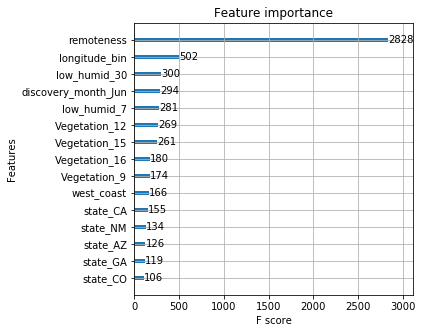

In [291]:
xgb.plot_importance(xg_clf,max_num_features = 15)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# Grid Searched XG Boost

In [65]:
from sklearn.model_selection import RandomizedSearchCV, KFold


In [66]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': [100,300,500],
              'learning_rate': [0.1,0.07,0.05,0.03,0.01],
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.5,0.45,0.4],
              'min_child_weight': [1, 2, 3]
             }

In [67]:
# initiate the Gridsearch model
gsearch1 = GridSearchCV(
    estimator = clf_xgb,
    param_grid = param_dist, 
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    iid=False, 
    cv=5)


In [68]:
gsearch1.fit(X_train_smote[selected_wrapper],y_train_smote)


Fitting 5 folds for each of 675 candidates, totalling 3375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 71.0min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 103.0min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 138.8min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 179.7min
[Parallel(n_jobs=-1)]: Done 3375 out of 3375 | elapsed: 191.1min finished


GridSearchCV(cv=5, estimator=XGBClassifier(), iid=False, n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.45, 0.4],
                         'learning_rate': [0.1, 0.07, 0.05, 0.03, 0.01],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 300, 500]},
             scoring='f1', verbose=1)

In [70]:
gsearch1.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 2,
 'n_estimators': 500}

In [71]:
gsearch1.best_score_

0.938353211318369

These hyperparameters will be used in the XGBoost above

Some info about xgboost:
* Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.
* Importance is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for. The performance measure may be the purity (Gini index) used to select the split points or another more specific error function.